In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import regionmask

In [6]:
monthly_forecast_temp_xr=xr.Dataset()
da1 = r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\POWER_Regional_monthly_1997_2020.nc"
da2 = r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\POWER_Regional_monthly_1997_2020_south.nc"
file_paths_list =[da1,da2]

for file in file_paths_list:
        monthly_forecast_temp_xr = xr.merge([monthly_forecast_temp_xr,xr.open_mfdataset(file)],compat='no_conflicts')

In [13]:
monthly_forecast_temp_xr

<xarray.Dataset>
Dimensions:      (time: 312, lon: 21, lat: 28)
Coordinates:
  * time         (time) float64 1.997e+05 1.997e+05 ... 2.02e+05 2.02e+05
  * lon          (lon) float32 41.25 41.75 42.25 42.75 ... 50.25 50.75 51.25
  * lat          (lat) float32 -1.75 -1.25 -0.75 -0.25 ... 10.75 11.25 11.75
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 dask.array<chunksize=(312, 28, 21), meta=np.ndarray>
    T2M_MAX      (time, lat, lon) float32 dask.array<chunksize=(312, 28, 21), meta=np.ndarray>

In [7]:
path = "./som_adm_ocha_itos_20230308_shp/" #sdn_adm_cbs_nic_ssa_20200831_shp/" 

states_gdf = gpd.read_file(path+"som_admbnda_adm1_ocha_20230308.shp") #sdn_admbnda_adm1_cbs_nic_ssa_20200831.shp")
#states_gdf

In [8]:
Awdal_aoi = states_gdf[states_gdf.ADM1_EN == "Awdal"]

# Get the total spatial extent for Awdal
Awdal_aoi.total_bounds

array([42.68310547,  9.6572876 , 44.23667672, 11.5114659 ])

In [9]:
# Get lat min, max
aoi_lat = [float(Awdal_aoi.total_bounds[1]), float(Awdal_aoi.total_bounds[3])]
aoi_lon = [float(Awdal_aoi.total_bounds[0]), float(Awdal_aoi.total_bounds[2])]

aoi_lat, aoi_lon

([9.657287598000039, 11.511465902000054],
 [42.683105469000054, 44.23667671700008])

In [14]:
# Slice the data by time and spatial extent
start_date = 199701
end_date = 199702

two_months_Awdal = monthly_forecast_temp_xr["T2M_MAX"].sel(
    time=slice(start_date, end_date),
    lon=slice(aoi_lon[0], aoi_lon[1]),
    lat=slice(aoi_lat[0], aoi_lat[1]))
two_months_Awdal

<xarray.DataArray 'T2M_MAX' (time: 2, lat: 4, lon: 3)>
dask.array<getitem, shape=(2, 4, 3), dtype=float32, chunksize=(2, 4, 3), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 1.997e+05 1.997e+05
  * lon      (lon) float32 42.75 43.25 43.75
  * lat      (lat) float32 9.75 10.25 10.75 11.25
Attributes:
    long_name:      Temperature_at_2_Meters_Maximum
    standard_name:  Temperature at 2 Meters Maximum
    units:          C

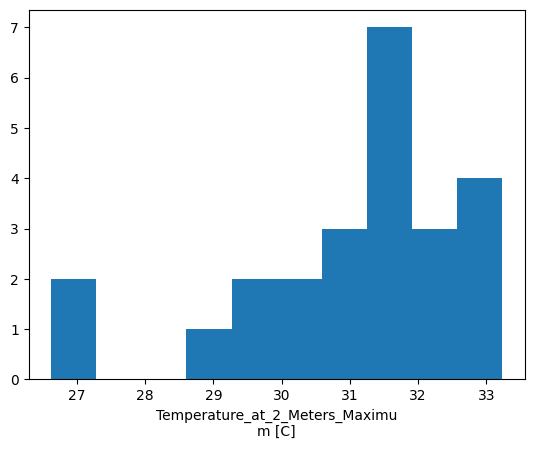

In [15]:
# Plot an histogram
two_months_Awdal.plot()
plt.show()

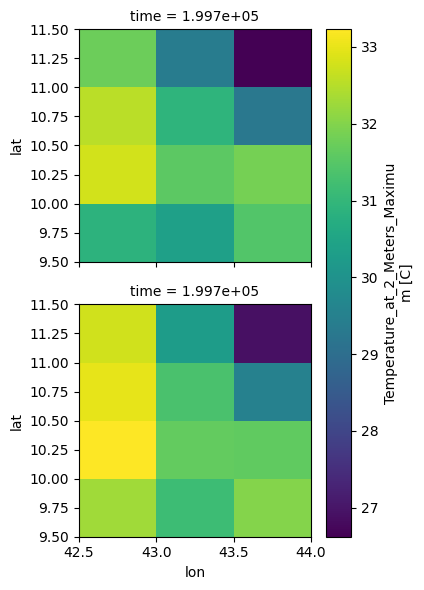

In [16]:
# Spatial Plot for the selected AOI (Awdal)
two_months_Awdal.plot(col='time',
                     col_wrap=1)

plt.show()

In [17]:
# Only subset by location / not time
Awdal_ts = monthly_forecast_temp_xr["T2M_MAX"].sel(
    lon=slice(aoi_lon[0], aoi_lon[1]),
    lat=slice(aoi_lat[0], aoi_lat[1]))
Awdal_ts

<xarray.DataArray 'T2M_MAX' (time: 312, lat: 4, lon: 3)>
dask.array<getitem, shape=(312, 4, 3), dtype=float32, chunksize=(312, 4, 3), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 1.997e+05 1.997e+05 1.997e+05 ... 2.02e+05 2.02e+05
  * lon      (lon) float32 42.75 43.25 43.75
  * lat      (lat) float32 9.75 10.25 10.75 11.25
Attributes:
    long_name:      Temperature_at_2_Meters_Maximum
    standard_name:  Temperature at 2 Meters Maximum
    units:          C

In [31]:
#separate the first 4 digits of the time values
Awdal_ts['year']=Awdal_ts['time'].astype(str).str[:4].astype(np.int64)


(array([10., 23., 23., 25., 14., 20., 30., 60., 61., 22.]),
 array([30.86846161, 31.63376999, 32.39907837, 33.16438293, 33.92969131,
        34.69499969, 35.46030807, 36.22561646, 36.99092102, 37.7562294 ,
        38.52153778]),
 <BarContainer object of 10 artists>)

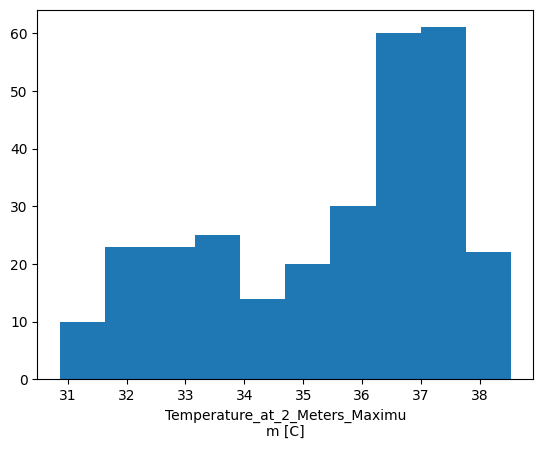

In [33]:
## groupby variable 'time' by year

Awdal_ts.groupby('year').mean(dim='time').plot()

In [34]:
# Time series plot of max temperature per year for Awdal

# This is the max value in each pixel across all months for each year
Awdal_annual_max = Awdal_ts.groupby('year').max(skipna=True)
Awdal_annual_max

<xarray.DataArray 'T2M_MAX' (year: 24, lat: 4, lon: 3)>
dask.array<transpose, shape=(24, 4, 3), dtype=float32, chunksize=(24, 4, 3), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 42.75 43.25 43.75
  * lat      (lat) float32 9.75 10.25 10.75 11.25
  * year     (year) int64 1997 1998 1999 2000 2001 ... 2016 2017 2018 2019 2020
Attributes:
    long_name:      Temperature_at_2_Meters_Maximum
    standard_name:  Temperature at 2 Meters Maximum
    units:          C

In [35]:
Awdal_annual_max_val = Awdal_annual_max.groupby("year").max(["lat", "lon"])
Awdal_annual_max_val

<xarray.DataArray 'T2M_MAX' (year: 24)>
dask.array<_nanmax_skip-aggregate, shape=(24,), dtype=float32, chunksize=(24,), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 1997 1998 1999 2000 2001 ... 2016 2017 2018 2019 2020

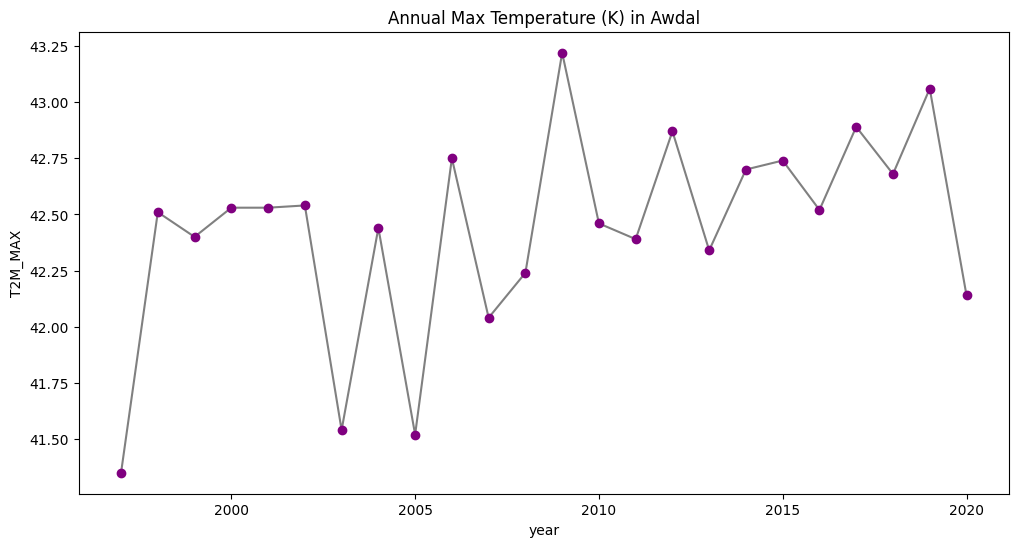

In [36]:
# Plot the data
f, ax = plt.subplots(figsize=(12, 6))
Awdal_annual_max_val.plot.line(hue='lat',
                              marker="o",
                              ax=ax,
                              color="grey",
                              markerfacecolor="purple",
                              markeredgecolor="purple")
ax.set(title="Annual Max Temperature (K) in Awdal")
plt.show()

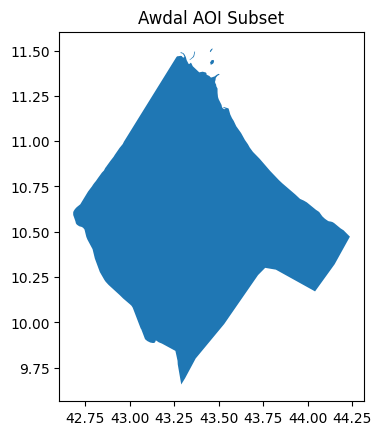

In [37]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.
f, ax = plt.subplots()
Awdal_aoi.plot(ax=ax)
ax.set(title="Awdal AOI Subset")

plt.show()

In [38]:
Awdal_aoi

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,5.657071,1.312224,Awdal,SO11,Somalia,SO,2022-12-21,2023-03-08,NaN,"MULTIPOLYGON (((43.46189 11.42429, 43.45532 11..."


In [39]:
Awdal_mask = regionmask.mask_3D_geopandas(Awdal_aoi,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)
Awdal_mask

<xarray.DataArray 'mask' (region: 1, lat: 28, lon: 21)>
array([[[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
...
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False,  True, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False,  True,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False,  True, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]]])
Coordinates:
  * lat      (lat) float32 -1.75 -1.25 -0.75 -0.25 ... 10.25 10.75 11.25 11.75
  * lon      (lon) float32 41.25 41.75 42.25 42.75 ... 49.75 50.25 50.75 51.25
  * region   (region) int32 0
Attributes:
    standard_name:  region

In [43]:
# Slice out two months of data
two_months = monthly_forecast_temp_xr.sel(
    time=slice(200910, 200912))

In [44]:
# Apply the mask for Awdal to the data
two_months = two_months.where(Awdal_mask)
two_months

<xarray.Dataset>
Dimensions:      (time: 3, lat: 28, lon: 21, region: 1)
Coordinates:
  * time         (time) float64 2.009e+05 2.009e+05 2.009e+05
  * lon          (lon) float32 41.25 41.75 42.25 42.75 ... 50.25 50.75 51.25
  * lat          (lat) float32 -1.75 -1.25 -0.75 -0.25 ... 10.75 11.25 11.75
  * region       (region) int32 0
Data variables:
    PRECTOTCORR  (time, lat, lon, region) float32 dask.array<chunksize=(3, 28, 21, 1), meta=np.ndarray>
    T2M_MAX      (time, lat, lon, region) float32 dask.array<chunksize=(3, 28, 21, 1), meta=np.ndarray>

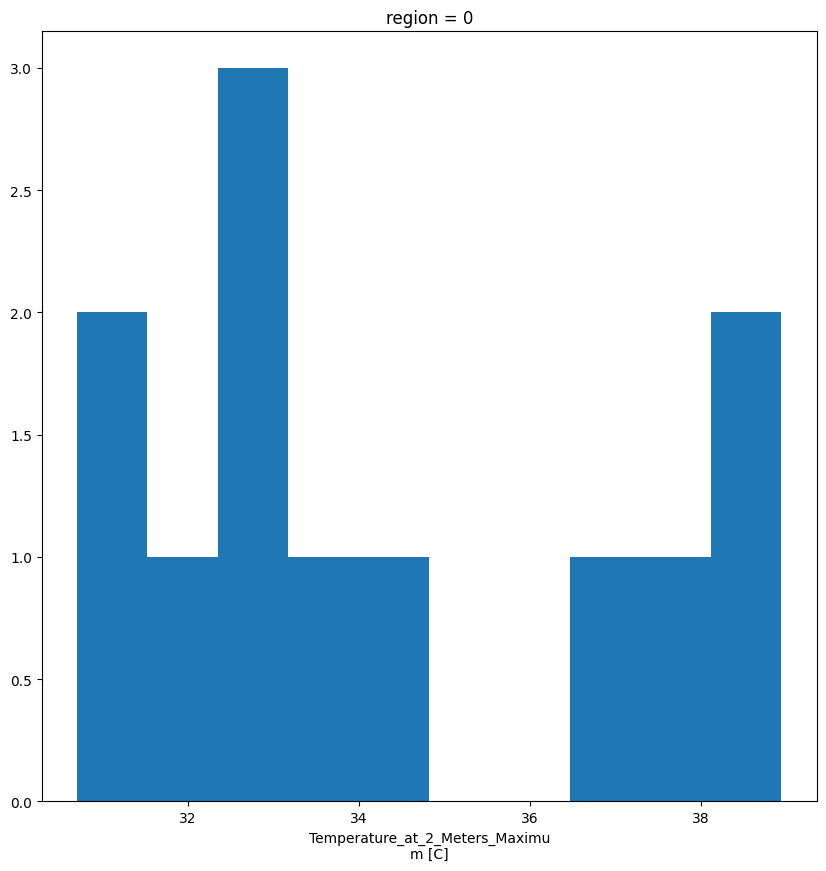

In [45]:
two_months["T2M_MAX"].plot(#col='time',
                                   col_wrap=1,
                                   figsize=(10, 10))
plt.show()

In [48]:
two_months_masked = monthly_forecast_temp_xr["T2M_MAX"].sel(time=slice(200911, 200912),
                                                                    lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(Awdal_mask)
two_months_masked.dims

('time', 'lat', 'lon', 'region')

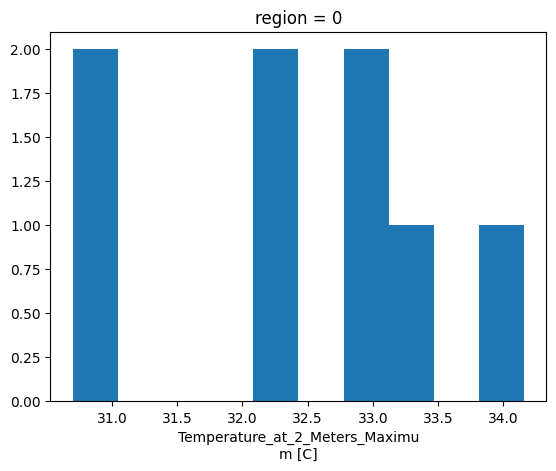

In [49]:
two_months_masked.plot(col_wrap=1)
plt.show()

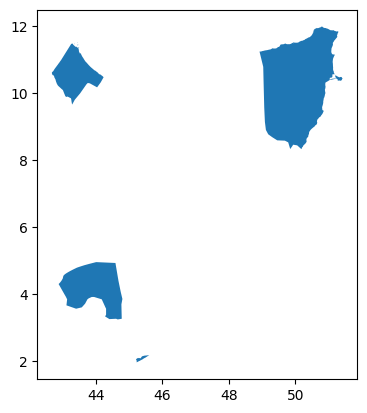

In [50]:
# Start by extracting a few states from the states_gdf
states_gdf["ADM1_EN"]

regions_nev = states_gdf[states_gdf.ADM1_EN.isin(
    ["Awdal", "Bakool", "Banadir", "Bari"])]
regions_nev.plot()
plt.show()

In [51]:
regions_mask = regionmask.mask_3D_geopandas(regions_nev,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)
regions_mask

<xarray.DataArray 'mask' (region: 3, lat: 28, lon: 21)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True, False],
        [False, False, False, ...,  True,  True, False],
        [False, False, False, ..., False,  True,  True]]])
Coordinates:
  * lat      (lat) float32 -1.75 -1.25 -0.75 -0.25 ... 10.25 10.75 11.25 11.75
  * lon      (lon) float32 41.25 41.75 42.25 42.75 ... 49.75 50.25 50.75 51.25
  * region   (region) int32 0 1 3
Attributes:
    standard_name:  region

In [53]:
def get_aoi(shp, world=True):
    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

bounds = get_aoi(regions_nev)

In [55]:
# Slice the data
start_date = 200001
end_date = 200002

# Subset
two_months_region = monthly_forecast_temp_xr["T2M_MAX"].sel(
    time=slice(start_date, end_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))
two_months_region

<xarray.DataArray 'T2M_MAX' (time: 2, lat: 20, lon: 18)>
dask.array<getitem, shape=(2, 20, 18), dtype=float32, chunksize=(2, 20, 18), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 2e+05 2e+05
  * lon      (lon) float32 42.75 43.25 43.75 44.25 ... 49.75 50.25 50.75 51.25
  * lat      (lat) float32 2.25 2.75 3.25 3.75 4.25 ... 10.25 10.75 11.25 11.75
Attributes:
    long_name:      Temperature_at_2_Meters_Maximum
    standard_name:  Temperature at 2 Meters Maximum
    units:          C

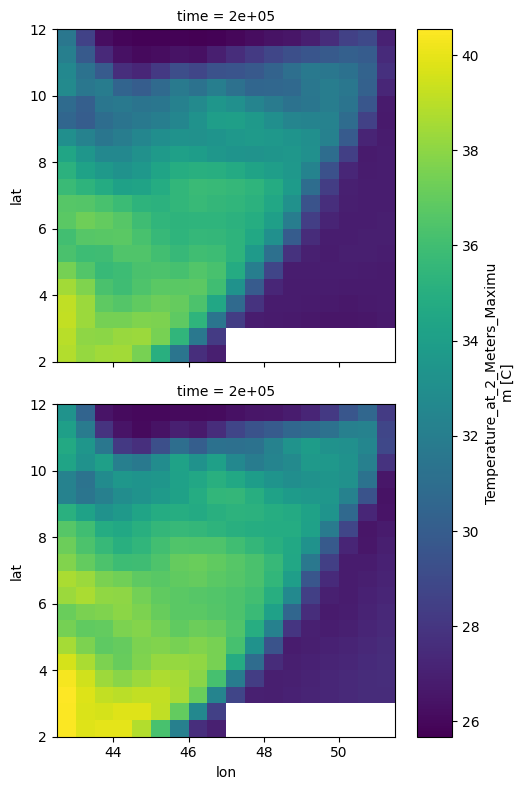

In [56]:
two_months_region.plot(col="time",
                           col_wrap=1,
                           figsize=(5, 8))
plt.show()

In [57]:
# Apply the mask for the west coast subset
two_months_region = two_months_region.where(regions_mask)
two_months_region.dims

('time', 'lat', 'lon', 'region')

In [58]:
two_months_region.region

<xarray.DataArray 'region' (region: 3)>
array([0, 1, 3])
Coordinates:
  * region   (region) int32 0 1 3

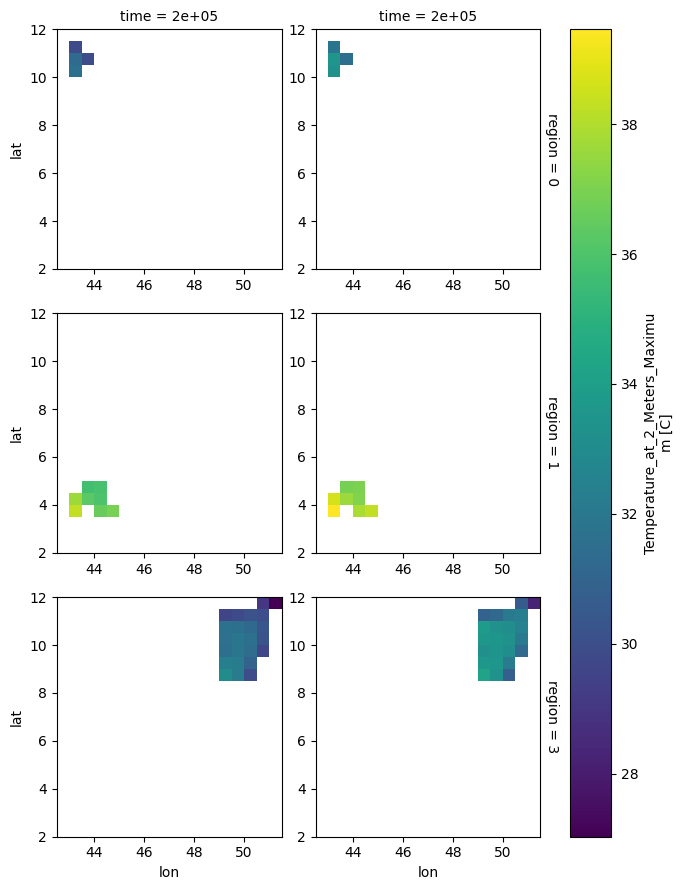

In [59]:
two_months_region.plot(col="time",
                           row="region",
                           sharey=False, sharex=False)
plt.show()

In [60]:
summary = two_months_region.groupby("time").mean(["lat", "lon"])
summary.to_dataframe()

T2M_MAX
time     region           
200001.0 0       30.650000
         1       36.652500
         3       30.863749
200002.0 0       32.540001
         1       37.870003
         3       32.469166

In [62]:
# Slice the data by time and spatial extent
start_date = 199701
end_date = 200912

monthly_forecast = monthly_forecast_temp_xr["T2M_MAX"].sel(
    time=slice(start_date, end_date))
monthly_forecast

<xarray.DataArray 'T2M_MAX' (time: 168, lat: 28, lon: 21)>
dask.array<getitem, shape=(168, 28, 21), dtype=float32, chunksize=(168, 28, 21), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 1.997e+05 1.997e+05 ... 2.009e+05 2.009e+05
  * lon      (lon) float32 41.25 41.75 42.25 42.75 ... 49.75 50.25 50.75 51.25
  * lat      (lat) float32 -1.75 -1.25 -0.75 -0.25 ... 10.25 10.75 11.25 11.75
Attributes:
    long_name:      Temperature_at_2_Meters_Maximum
    standard_name:  Temperature at 2 Meters Maximum
    units:          C

In [63]:
Awdal_aoi = states_gdf[states_gdf.ADM1_EN == "Awdal"]

Awdal_mask = regionmask.mask_3D_geopandas(Awdal_aoi,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)

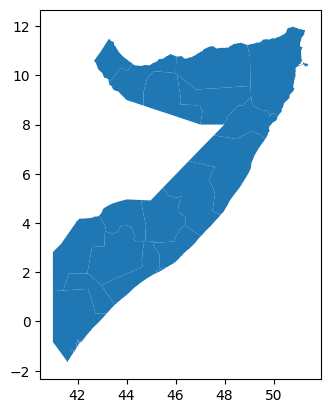

In [64]:
# Start by extracting a few states from the states_gdf
states_gdf["ADM1_EN"]

regions_nev = states_gdf[states_gdf.ADM1_EN.isin(states_gdf["ADM1_EN"])]
regions_nev.plot()
plt.show()

In [65]:
region_mask = regionmask.mask_3D_geopandas(regions_nev,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)
region_mask

<xarray.DataArray 'mask' (region: 17, lat: 28, lon: 21)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float32 -1.75 -1.25 -0.75 -0.25 ... 10.25 10.75 11.25 11.75
  * lon      (lon) float32 41.25 41.75 42.25 42.75 ... 49.75 50.25 50.75 51.25
  * region   (region) int32 0 1 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
Attributes:
    standard_name:  region

In [66]:
summary = monthly_forecast.where(region_mask).groupby("time").mean(["lat", "lon"])
summary.to_dataframe()

T2M_MAX
time     region           
199701.0 0       30.277500
         1       36.488747
         3       29.962084
         4       38.415001
         5       34.728237
...                    ...
200912.0 13      33.685001
         14      31.791666
         15      34.139999
         16      33.370998
         17      31.789999

[2856 rows x 1 columns]

In [67]:
temperature = summary.to_dataframe()

In [68]:
temperature=temperature.reset_index(level=[ 1])

replacement_dict = {0  :  'Awdal',
1    :         'Bakool',
2      :       'Banadir',
3      :         'Bari',
4       :         'Bay',
5        :  'Galgaduud',
6          :      'Gedo',
7          :   'Hiraan',
8   :       'Lower Juba',
9   :   'Lower Shabelle',
10  :      'Middle Juba',
11   : 'Middle Shabelle',
12    :          'Mudug',
13    :        'Nugaal',
14      :       'Sanaag',
15       :        'Sool',
16        :   'Togdheer',
17   : 'Woqooyi Galbeed'}

# Replace values in the 'Column1' column using the dictionary
temperature['region'] = temperature['region'].replace(replacement_dict)

In [69]:
temperature = temperature.rename(columns={'region': 'admin1'})
temperature = temperature.reset_index(level=[ 0])

In [70]:
temperature

,time,admin1,T2M_MAX
0,199701.0,Awdal,30.277500
1,199701.0,Bakool,36.488747
2,199701.0,Bari,29.962084
3,199701.0,Bay,38.415001
4,199701.0,Galgaduud,34.728237
...,...,...,...
2851,200912.0,Nugaal,33.685001
2852,200912.0,Sanaag,31.791666
2853,200912.0,Sool,34.139999
2854,200912.0,Togdheer,33.370998


In [ ]:
#temperature.to_csv('temperature.csv', index=False)

In [72]:
summary = monthly_forecast_temp_xr["T2M_MAX"].where(region_mask).groupby("time").mean(["lat", "lon"])
summary.to_dataframe()

T2M_MAX
time     region           
199701.0 0       30.277500
         1       36.488747
         3       29.962084
         4       38.415001
         5       34.728237
...                    ...
202013.0 13      37.683998
         14      37.331665
         15      37.717499
         16      36.561001
         17      38.066002

[5304 rows x 1 columns]

In [73]:
summary = summary.to_dataframe()
summary=summary.reset_index(level=[ 1])

replacement_dict = {0  :  'Awdal',
1    :         'Bakool',
2      :       'Banadir',
3      :         'Bari',
4       :         'Bay',
5        :  'Galgaduud',
6          :      'Gedo',
7          :   'Hiraan',
8   :       'Lower Juba',
9   :   'Lower Shabelle',
10  :      'Middle Juba',
11   : 'Middle Shabelle',
12    :          'Mudug',
13    :        'Nugaal',
14      :       'Sanaag',
15       :        'Sool',
16        :   'Togdheer',
17   : 'Woqooyi Galbeed'}

# Replace values in the 'Column1' column using the dictionary
summary['region'] = summary['region'].replace(replacement_dict)

In [74]:
summary = summary.rename(columns={'region': 'admin1'})
summary = summary.reset_index(level=[ 0])

In [75]:
#summary.to_csv('temperature1.csv', index=False)